In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib

In [2]:
# import netflix data csv.
df = pd.read_csv('viewing-activity-data.csv')

In [3]:
# number of rows and columns
df.shape

(39389, 10)

In [4]:
# show data rows.
df.head(2)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Brother Two,2/18/2022 8:36,0:19:03,NaN,Komi Can't Communicate: Season 1: It's just th...,NaN,DefaultWidevineAndroidPhone,0:24:01,0:24:01,US (United States)
1,Brother Two,2/18/2022 7:10,0:03:43,NaN,Komi Can't Communicate: Season 1: It's just th...,NaN,DefaultWidevineAndroidPhone,0:03:53,Not latest view,US (United States)


In [5]:
# remove coulumns you do not want to analyze by adding them to df.drop
# QUESTION: Do you recomend cleaning data in csv or python? 
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(2)

,Profile Name,Start Time,Duration,Title
0,Brother Two,2/18/2022 8:36,0:19:03,Komi Can't Communicate: Season 1: It's just th...
1,Brother Two,2/18/2022 7:10,0:03:43,Komi Can't Communicate: Season 1: It's just th...


In [6]:
# provides a list of the data types for each column
df.dtypes

Profile Name    object
Start Time      object
Duration        object
Title           object
dtype: object

In [7]:
# convert Start Time from object to datetime
# attach UTC to datetime format 
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
dtype: object

In [8]:
# change Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

df.head(1)


,Start Time,Profile Name,Duration,Title
0,2022-02-18 03:36:00-05:00,Brother Two,0:19:03,Komi Can't Communicate: Season 1: It's just th...


In [9]:
# convert Duration from object to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time      datetime64[ns, US/Eastern]
Profile Name                        object
Duration                   timedelta64[ns]
Title                               object
dtype: object

In [10]:
# create a new datafrom called American Horror Story (ahs) that pulls from df
# pulls only rows with the Title column containing American Horror Story
ahs = df[df['Title'].str.contains('American Horror Story', regex=False)]
ahs.sample(20)

,Start Time,Profile Name,Duration,Title
6151,2016-10-06 20:35:00-04:00,Brother Two,0 days 00:52:34,American Horror Story: Hotel: Mommy (Episode 3)
3452,2018-10-20 02:53:00-04:00,Brother Two,0 days 00:13:32,American Horror Story: Cult: Winter of Our Dis...
3445,2018-10-22 02:44:00-04:00,Brother Two,0 days 00:09:10,American Horror Story: Cult: Drink the Kool-Ai...
3434,2018-10-24 02:37:00-04:00,Brother Two,0 days 00:05:43,American Horror Story: Cult: Great Again (Epis...
3455,2018-10-19 02:31:00-04:00,Brother Two,0 days 00:06:10,American Horror Story: Cult: Holes (Episode 5)
6146,2016-10-07 16:27:00-04:00,Brother Two,0 days 00:00:11,American Horror Story: Hotel: Room Service (Ep...
6147,2016-10-07 15:38:00-04:00,Brother Two,0 days 00:48:20,American Horror Story: Hotel: Devil's Night (E...
3436,2018-10-23 03:20:00-04:00,Brother Two,0 days 00:01:02,American Horror Story: Cult: Charles (Manson) ...
33842,2018-09-26 20:43:00-04:00,Me,0 days 00:00:02,American Horror Story: Coven: Fearful Pranks E...
7428,2021-07-13 00:55:00-04:00,Brother One,0 days 00:00:06,American Horror Story: Apocalypse_hook_primary...


In [12]:
# removes views under 1 min to filter out trailers
ahs = ahs[(ahs['Duration'] > '0 days 00:01:00')]

In [13]:
# sums ahs watch time
ahs['Duration'].sum()

Timedelta('0 days 22:38:56')

In [18]:
ahs['weekday'] = ahs['Start Time'].dt.weekday
ahs['hour'] = ahs['Start Time'].dt.hour

<AxesSubplot:title={'center':'AHS Episodes Watched by Day'}>

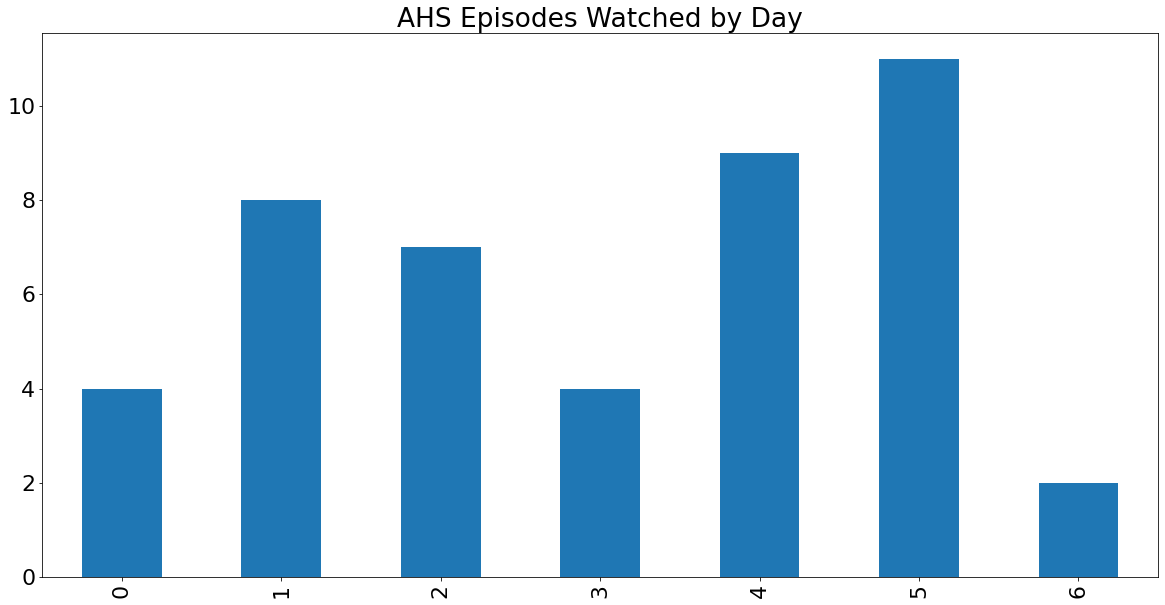

In [19]:
# set our categorical and define the order so the days are plotted Monday-Sunday
ahs['weekday'] = pd.Categorical(ahs['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
ahs_by_day = ahs['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
ahs_by_day = ahs_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
ahs_by_day.plot(kind='bar', figsize=(20,10), title='AHS Episodes Watched by Day')

In [ ]:
def myfunction():
    users = ['Me', 'Mother', 'Sister']
    for i in users: